# Sesión 2- Pandas

## Contenido 

1. [Unir datos](#unir)
2. [Visualización de datos](#vis)
3. [Series de tiempo](#time)
4. [Eliminando datos](#del)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Unir datos 

Pandas proporciona varias funciones para combinar fácilmente Series o DataFrames con varios tipos de conjuntos lógicos.

In [3]:
info_1 = {
        'identificacion': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Eliana', 'Juan', 'Leonardo', 'Juan', 'Daniela'], 
        'apellido': ['Bonalde', 'Olmos', 'Lopez', 'Basto', 'Jaimes']}

info_2 = {
        'identificacion': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Maria', 'Brayan', 'Bran', 'Juan', 'Betty'], 
        'apellido': ['Ortega', 'Bermudez', 'Gutierrez', 'Barajas', 'González']}

info_3 = {
        'identificacion': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'nota': [51, 15, 25, 71, 16, 14, 15, 1, 61, 68]}

In [4]:
# Crear los 3 DataFrames con la información anterior
datos1 = pd.DataFrame(info_1)
datos2 = pd.DataFrame(info_2)
datos3 = pd.DataFrame(info_3)
datos1

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes


Un atajo útil para concat() son los métodos de instancia append() en Series y DataFrame.
Estos métodos en realidad son anteriores a concat(). Concatenan a lo largo del eje = 0.

In [5]:
# Unir los datos1 y datos2 por medio de append()
union = datos1.append(datos2)
union

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes
0,4,Maria,Ortega
1,5,Brayan,Bermudez
2,6,Bran,Gutierrez
3,7,Juan,Barajas
4,8,Betty,González


La función concat() hace todo el trabajo pesado de realizar operaciones de concatenación a lo largo de un eje mientras realiza una lógica de conjunto opcional (unión o intersección) de los índices (si los hay) en los otros ejes. 

In [6]:
personas = pd.concat([datos1, datos2])
personas

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes
0,4,Maria,Ortega
1,5,Brayan,Bermudez
2,6,Bran,Gutierrez
3,7,Juan,Barajas
4,8,Betty,González


In [8]:
personas_col = pd.concat([datos1, datos2], axis = 'columns')
personas_col

,identificacion,primer_nombre,apellido,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde,4,Maria,Ortega
1,2,Juan,Olmos,5,Brayan,Bermudez
2,3,Leonardo,Lopez,6,Bran,Gutierrez
3,4,Juan,Basto,7,Juan,Barajas
4,5,Daniela,Jaimes,8,Betty,González


In [9]:
personas_int = pd.concat([datos1, datos2], ignore_index=True)
personas_int

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes
5,4,Maria,Ortega
6,5,Brayan,Bermudez
7,6,Bran,Gutierrez
8,7,Juan,Barajas
9,8,Betty,González


In [14]:
personas_keys = pd.concat([datos1, datos2], axis = 0, keys =["Salón_1", "Salón_2"])
personas_keys

identificacion primer_nombre   apellido
Salón_1 0              1        Eliana    Bonalde
        1              2          Juan      Olmos
        2              3      Leonardo      Lopez
        3              4          Juan      Basto
        4              5       Daniela     Jaimes
Salón_2 0              4         Maria     Ortega
        1              5        Brayan   Bermudez
        2              6          Bran  Gutierrez
        3              7          Juan    Barajas
        4              8         Betty   González

In [15]:
personas_keys.loc["Salón_1",2] 

identificacion           3
primer_nombre     Leonardo
apellido             Lopez
Name: (Salón_1, 2), dtype: object

In [16]:
personas_keys.loc["Salón_1"] 

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes


pandas proporciona la función merge(), como punto de entrada para todas las operaciones de unión de bases de datos estándar entre DataFrames:

In [ ]:
pd.merge(personas, datos3, on='identificacion')

In [ ]:
pd.merge(datos1, datos2, on='identificacion', how='inner')

In [ ]:
pd.merge(datos1, datos2, on='identificacion', how='outer')

In [17]:
# Unir los datos 1 y los datos 2, en el valor "primer_nombre"
pd.merge(datos1, datos2, on=['primer_nombre','identificacion'])

,identificacion,primer_nombre,apellido_x,apellido_y


## 2. Visualización de datos

<function matplotlib.pyplot.show(close=None, block=None)>

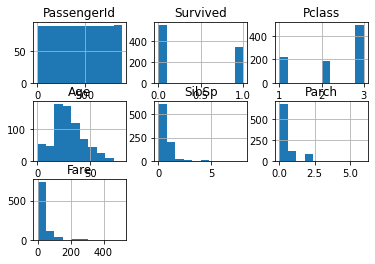

In [26]:
titanic = pd.read_csv('Data/train.csv')
titanic.hist()
plt.show

<AxesSubplot:xlabel='Survived'>

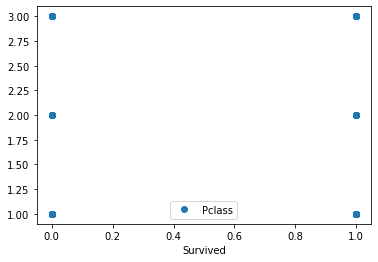

In [28]:
titanic.plot(x='Survived', y='Pclass', style='o') 

In [19]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:ylabel='Embarked'>

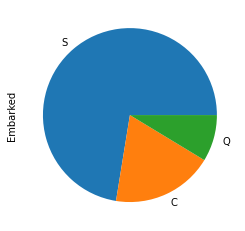

In [21]:
titanic.Embarked.value_counts().plot(kind='pie')

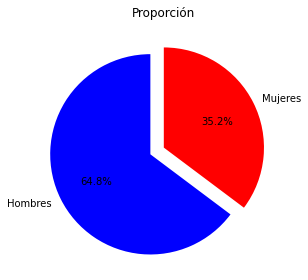

In [22]:
masculino = (titanic['Sex'] == 'male').sum()
femenino = (titanic['Sex'] == 'female').sum()

proporcion = [masculino, femenino]

plt.pie(
    proporcion,
    
    labels = ['Hombres', 'Mujeres'],

    colors = ['blue','red'],
    
    explode = (0.15 , 0),
    
    startangle = 90,
    
    autopct = '%1.1f%%'
    )

plt.title("Proporción")

plt.tight_layout()
plt.show()

(-5.0, 85.0)

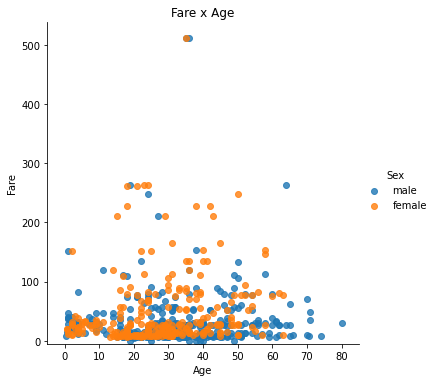

In [23]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

lm.set(title = 'Fare x Age')

axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)



/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

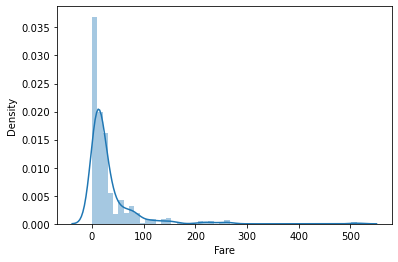

In [24]:
sns.distplot(titanic.Fare)

In [25]:
titanic.Survived.sum()

342

## 3. Series temporales 

Una serie de tiempo es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. Más comúnmente, una serie de tiempo es una secuencia tomada en puntos sucesivos igualmente espaciados en el tiempo. Es un método de conveniencia para conversión de frecuencia y remuestreo de series de tiempo. El objeto debe tener un índice similar a una fecha y hora.

pandas contiene amplias capacidades y características para trabajar con datos de series de tiempo para todos los dominios. Utilizando los tipos de dtypes datetime64 y timedelta64 de NumPy.

In [29]:
apple = pd.read_csv('Data/appl_1980_2014.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [30]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [31]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [32]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [33]:
# Revisar si hay fechas duplicadas
apple.index.is_unique

True

In [34]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


El remuestreo genera una distribución de muestreo única sobre la base de los datos reales. Podemos aplicar varias frecuencias para volver a muestrear nuestros datos de series de tiempo. 
Las frecuencias de series de tiempo más comúnmente utilizadas son: 
* W: frecuencia semanal
* M: frecuencia de fin de mes
* SM: frecuencia de fin de mes semestral 
* Q: frecuencia de un cuarto de final

In [42]:
# Se obtiene el último día hábil de cada mes
apple_month = apple.resample('M').last()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


In [36]:
(apple.index.max() - apple.index.min()).days

12261

In [46]:
# ¿Cuántos meses tienen los datos?
len(apple_month)

404

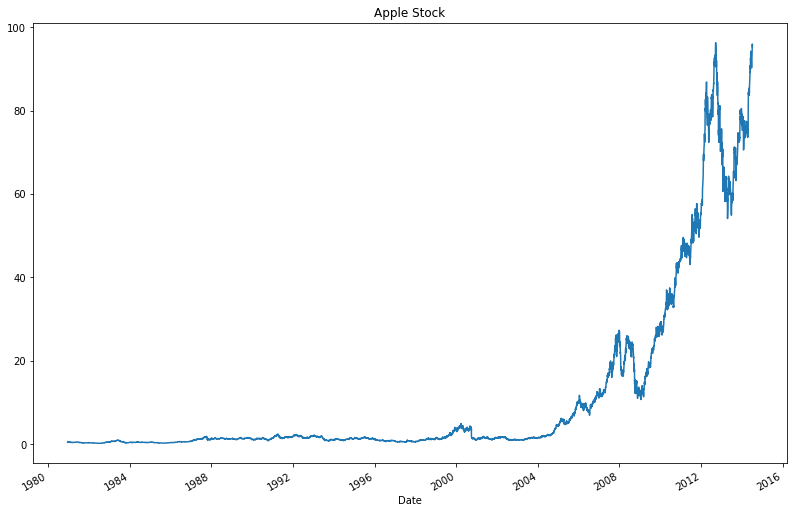

In [47]:
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

## 4. Eliminando datos

In [48]:
wine =  pd.read_csv('Data/wine.data')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


drop() elimina las etiquetas especificadas de filas o columnas.

Elimina filas o columnas especificando los nombres de las etiquetas y el eje correspondiente, o especificando directamente el índice o los nombres de las columnas. 

In [49]:
# Eliminar la primera, cuarta, séptima, novena, undécima, decimotercera y decimocuarta columnas
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [50]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [51]:
# Se establece los valores de las primeras 3 filas de alcohol como NaN
wine.iloc[0:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [ ]:
# Establezca el valor de las filas 3 y 4 de magnesio como NaN 


In [55]:
wine = wine.dropna(axis = 1, how = "any")
wine.head()

,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
3,2.59,21.0,118,2.69,1.82,4.32
4,1.76,15.2,112,3.39,1.97,6.75
5,1.87,14.6,96,2.52,1.98,5.25
6,2.15,17.6,121,2.51,1.25,5.05
7,1.64,14.0,97,2.98,1.98,5.20


A veces, el archivo csv tiene valores nulos, que luego se muestran como NaN en el marco de datos. Al igual que el método pandas dropna() administra y elimina valores nulos de un marco de datos, fillna() administra y permite que el usuario reemplace los valores NaN con algún valor propio.

In [54]:
wine.iloc[1:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,NaN,1.76,15.2,112,3.39,1.97,6.75
5,NaN,1.87,14.6,96,2.52,1.98,5.25
6,14.06,2.15,17.6,121,2.51,1.25,5.05
7,14.83,1.64,14.0,97,2.98,1.98,5.20


In [ ]:
# Se llena el valor de NaN con el número 10 en alcohol y 100 en magnesio
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

[Referencias](#refe)

## Ejercicio final

En el siguiente un dataset de los flujos de fondo de los Estados Unidos:
https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv.

* Convierta las fechas en un DatetimeIndex
* Cambie la frecuencia a mensual, sume los valores y asígnela ese valor a cada mes
* Eliminar las filas que obtuvieron valores Nan